## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [33]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
import math
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

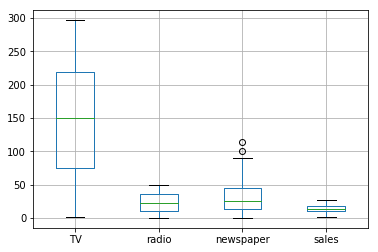

In [35]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

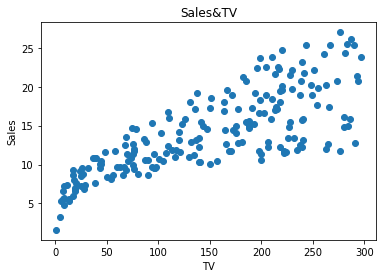

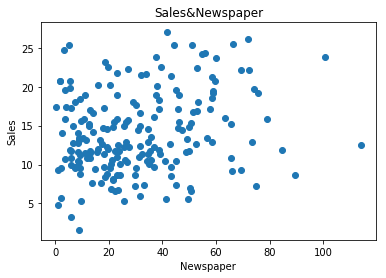

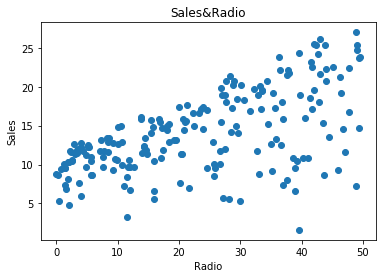

In [36]:
#plot sales and TV
fig1 = plt.figure()  
ax1 = fig1.add_subplot(111)
ax1.set_title('Sales&TV')
plt.xlabel('TV')
plt.ylabel('Sales')
ax1.scatter(y=df['sales'],x=df['TV'])

#plot sales and newspaper
fig2 = plt.figure()  
ax2 = fig2.add_subplot(111)
ax2.set_title('Sales&Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
ax2.scatter(y=df['sales'],x=df['newspaper'])

#plot sales and radio
fig3=plt.figure()  
ax3=fig3.add_subplot(111)
ax3.set_title('Sales&Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
ax3.scatter(y=df['sales'],x=df['radio'])


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AFE852BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019AFDF64EF0>]], dtype=object)

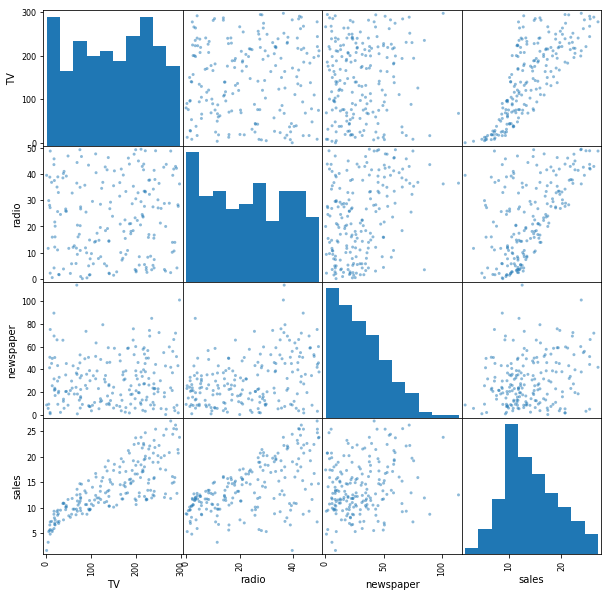

In [37]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV&sales and radio&sales seam correlated with one another. Because plots of this two pairs have a linear trend rather than random plots.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [38]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [39]:
y=df['sales']

b) Set X to be just the features described above in df

In [40]:
x=df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [41]:
import random
#create shuffled primary key for samples 
size=df.shape[0]
key=list(range(1,size+1))
random.shuffle(key)
key_train=key[0:int(size*0.8)]
key_test=key[int(size*0.8):]
#create training and testing set according to key
y_train=y.loc[key_train]
x_train=x.loc[key_train]
y_test=y.loc[key_test]
x_test=x.loc[key_test]
x_train['TV']

127      7.8
134    219.8
19      69.2
43     293.6
27     142.9
36     290.7
91     134.3
28     240.1
116     75.1
175    222.4
176    276.9
118     76.4
102    296.4
182    218.5
160    131.7
59     210.8
110    255.4
32     112.9
196     38.2
106    137.9
84      68.4
90     109.8
153    197.6
4      151.5
16     195.4
131      0.7
193     17.2
8      120.2
45      25.1
130     59.6
       ...  
31     292.9
57       7.3
162     85.7
51     199.8
139     43.0
125    229.5
164    163.5
168    206.8
151    280.7
42     177.0
128     80.2
93     217.7
34     265.6
183     56.2
37     266.9
77      27.5
109     13.1
187    139.5
73      26.8
30      70.6
10     199.8
185    253.8
135     36.9
56     198.9
145     96.2
25      62.3
35      95.7
33      97.2
63     239.3
71     199.1
Name: TV, Length: 160, dtype: float64

d) Train model on training data, and make predictions on testing data

In [42]:
#train model
model=LinearRegression()
model.fit(x_train,y_train)
print('Coefficients: TV, Radio, Newspaper\n', model.coef_, '\nIntercept: \n',model.intercept_)
prediction=model.predict(x_test)



Coefficients: TV, Radio, Newspaper
 [ 0.04593866  0.18812566  0.00136969] 
Intercept: 
 2.88562336616


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [43]:
print('R^2: \n',model.score(x_test,y_test))

R^2: 
 0.897495475505


It is a good model since $R^2$ score is 0.94.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

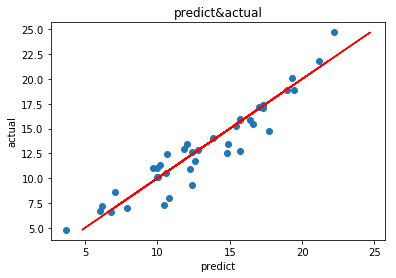

In [47]:
plt.title('predict&actual')
plt.xlabel('predict')
plt.ylabel('actual')
plt.scatter(model.predict(x_test),y_test)
plt.plot(y_test,y_test,color='red')


g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [23]:
#original coefficients
print('Coefficients: TV, Radio, Newspaper\n', model.coef_, '\n Intercept: \n',model.intercept_)
#standardized regression model
x_st=(1/math.sqrt(199))*(x_train-x_train.mean())/x_train.std()
y_st=(1/math.sqrt(199))*(y_train-y_train.mean())/y_train.std()
model_st=LinearRegression()
model_st.fit(x_st,y_st)
#standardized coefficients
print('Coefficients: TV, Radio, Newspaper\n', model_st.coef_)

Coefficients: TV, Radio, Newspaper
 [ 0.04570743  0.18485855 -0.00205162] 
 Intercept: 
 3.02103689584
Coefficients: TV, Radio, Newspaper
 [ 0.76458435  0.55243943 -0.0088437 ]


Before we look at coefficients of model, we should make sure that all features are standardized, Because features are in different values' size. After standardizing, we can see that TV displays most important impact towards sales, while Radio is the most important one before standardizing.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

We should always standardize data before doing regression if we want to compare the impact of each feature. 
However, we should still be cautious when considering importance of features only by comparing coefficients. In multiple regression, adding new features would change coefficients of existed features if they are correlated. Thus, we also need to test the correlation between every pair of features

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

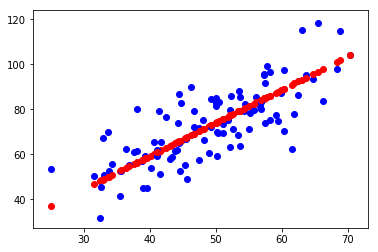

In [57]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("C:/Users/chenq/Documents/GitHub/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='blue')
        plt.scatter(points[i,0],m*points[i,0]+b,color='red')

run(100)

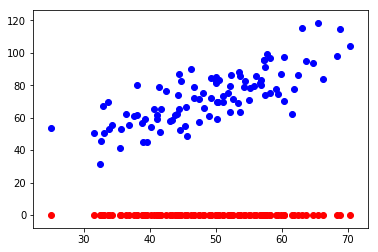

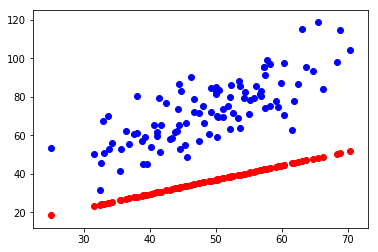

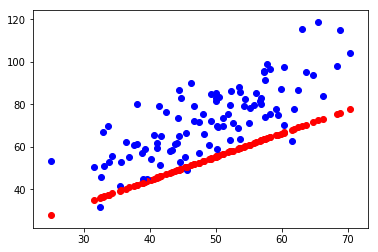

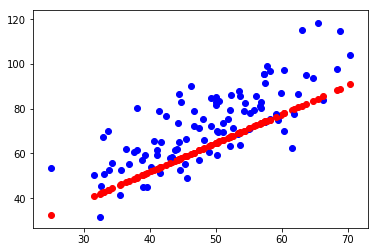

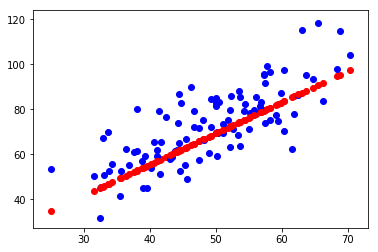

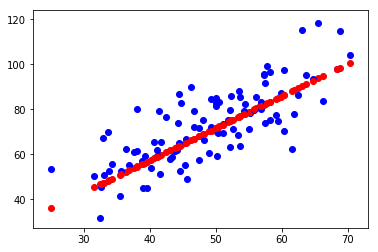

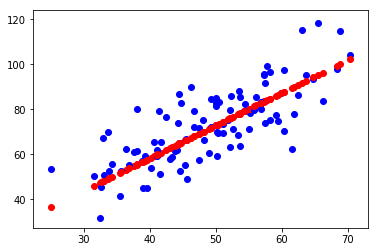

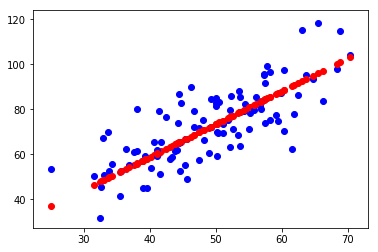

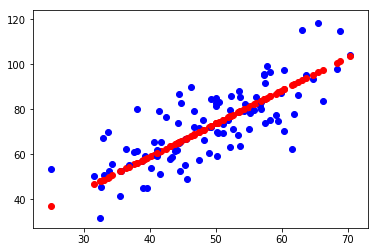

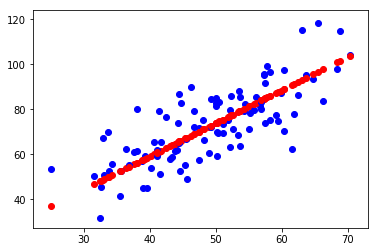

In [58]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

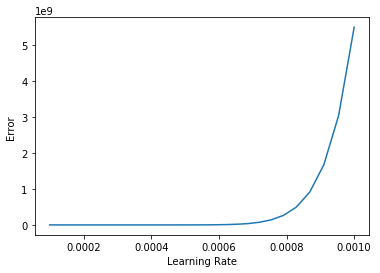

In [72]:
def compute_error_for_given_learning_rate(learning_rate):
    points = genfromtxt("C:/Users/chenq/Documents/GitHub/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 5
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    return(compute_error_for_line_given_points(b,m,points))

learning_rates = np.logspace(-4,-3,50)

errors = compute_error_for_given_learning_rate(learning_rates)
plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors)

Since the plot of learning rate vs error term is a log-like curve when the number of iterations is chosen to be 5. Then the error will dramatically increase when the learning rate is greater than 0.0007.